<a href="https://colab.research.google.com/github/Anujakhatri/Machine-learning/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
car_dataset= pd.read_csv('/content/car data.csv')

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


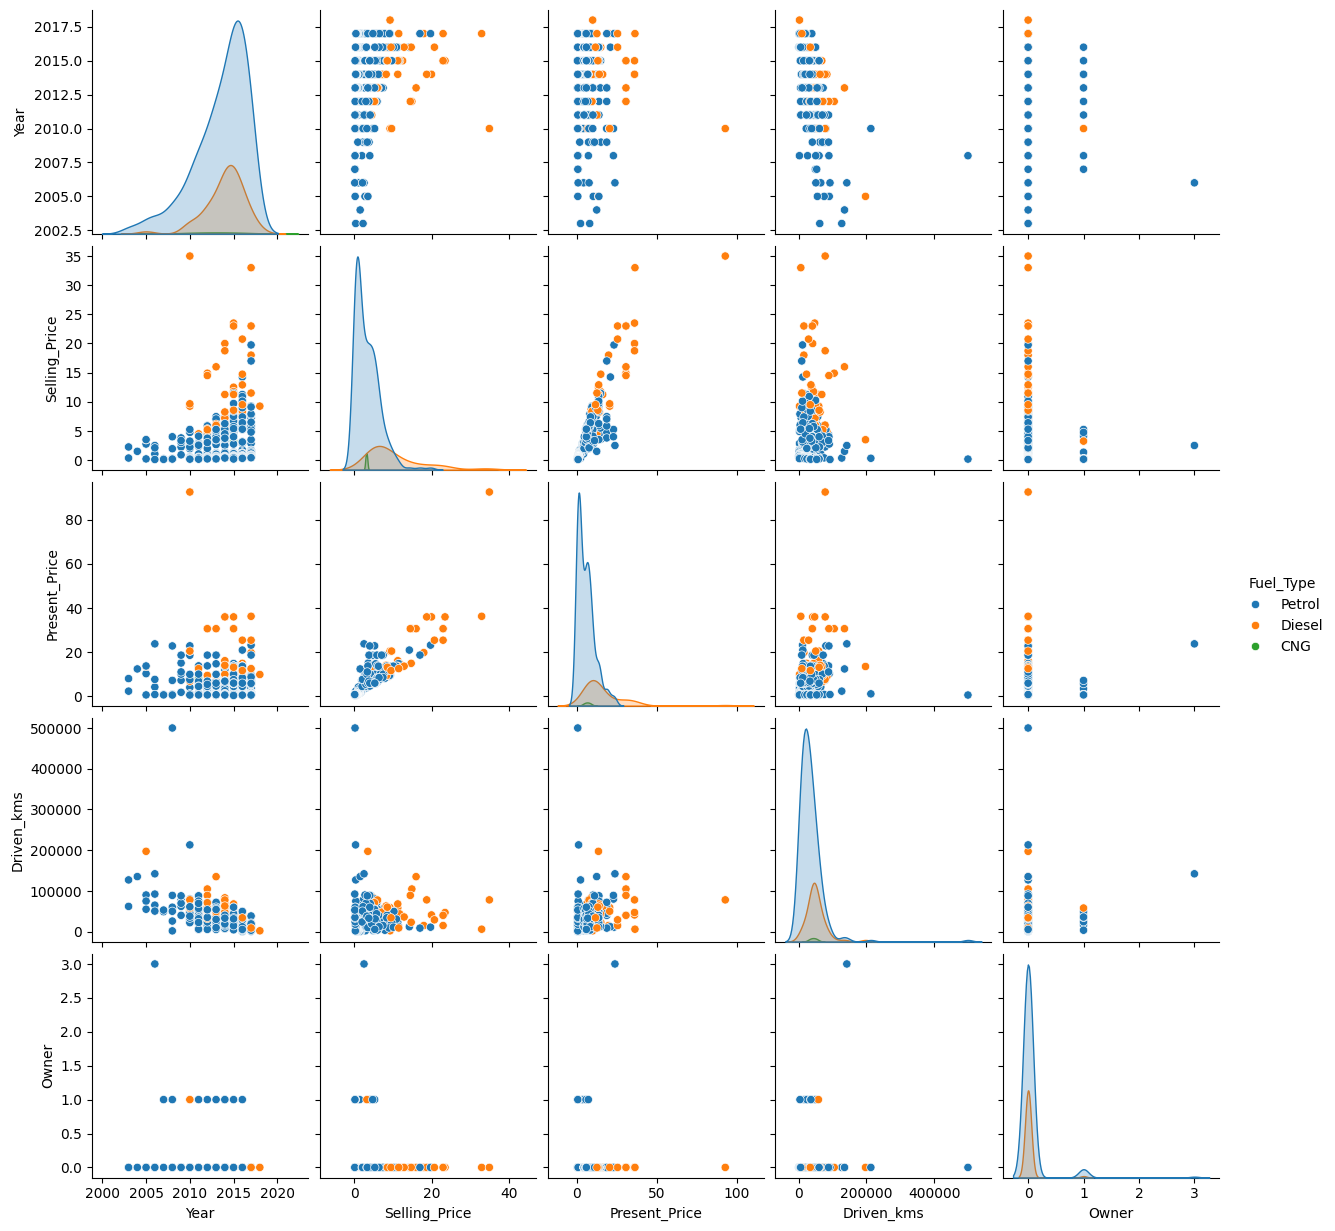

In [ ]:
#visualize the dataset
sns.pairplot(car_dataset, hue='Fuel_Type')

import libraries

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source



In [ ]:
#dataset columns
car_dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
#dataset describe
car_dataset.describe(include='all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


In [ ]:
#add 'current year' column with const value
car_dataset['Current Year']= 2025

#calculate the age of the vehickes by substracting the 'year' column
car_dataset['no_year']= car_dataset['Current Year'] - car_dataset['Year']


In [ ]:
#remove Current Year column
car_dataset.drop(['Current Year'], axis=1, inplace=True)

In [ ]:
#new updated data
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [ ]:
#defining dependent variable
dependent_variable= ['Selling_Price']

# Data Visualization

Top 10 Most Selling Car

/tmp/ipython-input-15-776678849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Car_Name', data=car_dataset, order=top10.index,palette='crest')


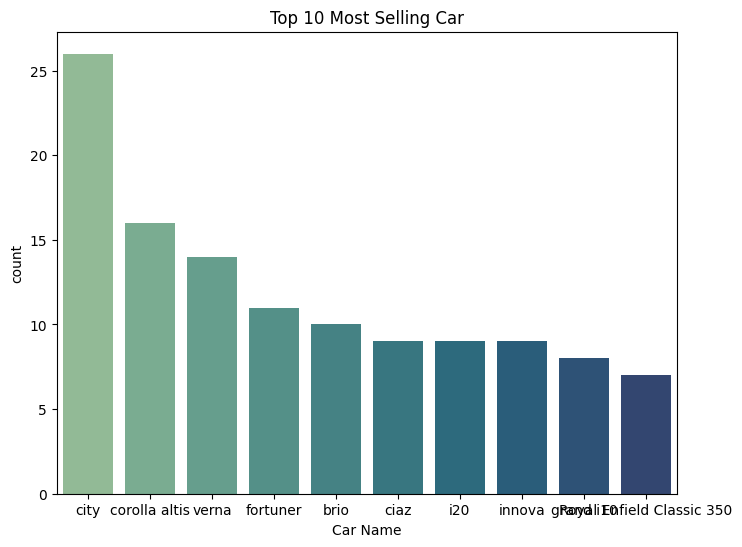

In [ ]:
top10=car_dataset['Car_Name'].value_counts()[:10]

plt.figure(figsize=(8,6))
sns.countplot(x='Car_Name', data=car_dataset, order=top10.index,palette='crest')
plt.xlabel('Car Name')
plt.title('Top 10 Most Selling Car')
plt.show()

Car bought in each year

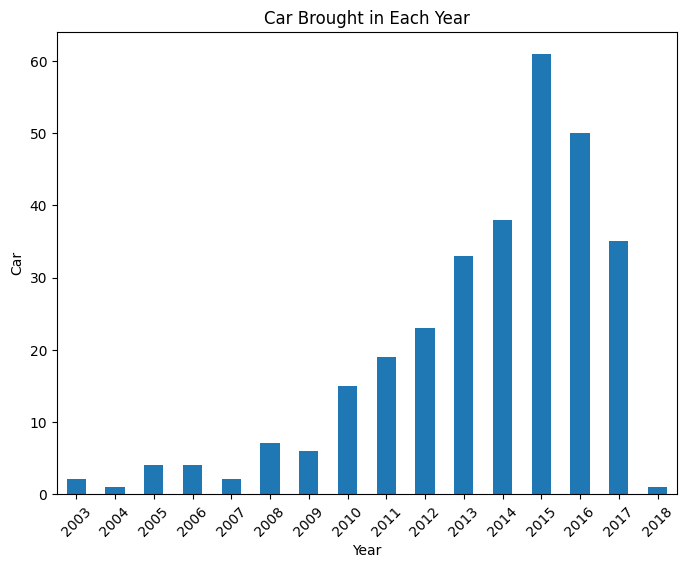

In [ ]:
plt.figure(figsize=(8,6))
yearly_counts=car_dataset.groupby('Year').count()['Car_Name']
yearly_counts.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Car')
plt.title('Car Brought in Each Year')
plt.show()

Kilometer driven vs selling price

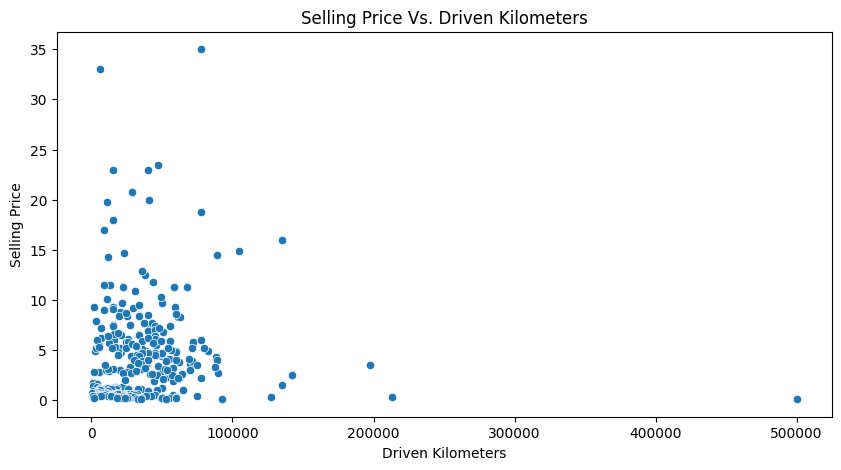

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=car_dataset,x='Driven_kms', y='Selling_Price')

plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')
plt.title('Selling Price Vs. Driven Kilometers')
plt.show()


# Feature Engineering

In [ ]:
q1,q3,median=car_dataset.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit=q1-1.5*(q3-q1)
upper_limit=q3+1.5*(q3-q1)
car_dataset['Selling_Price']=np.where(car_dataset['Selling_Price']>upper_limit,median,car_dataset['Selling_Price'])

for col in ['Present_Price','Driven_kms','Owner', 'no_year']:

  upper_limit=car_dataset[col].quantile(0.99)
  car_dataset[col]=np.where(car_dataset[col]>upper_limit,upper_limit,car_dataset[col])


Categorical encoding

In [ ]:
car_dataset.drop(['Car_Name'], axis=1, inplace=True)


In [ ]:
car_dataset=pd.get_dummies(car_dataset)

# Feature Manupulation

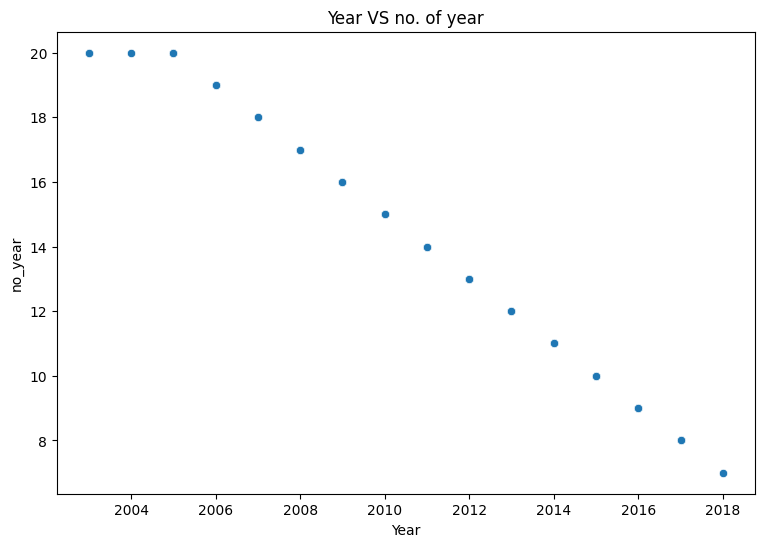

In [ ]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Year',y='no_year',data=car_dataset)
plt.xlabel('Year')
plt.ylabel('no_year')
plt.title('Year VS no. of year')
plt.show()

In [ ]:
car_dataset[['Year','no_year']].corr()

,Year,no_year
Year,1.000000,-0.998376
no_year,-0.998376,1.000000


In [ ]:
car_dataset.drop(['Year'], axis=1, inplace=True)

Feature Selection

In [ ]:
features = [i for i in car_dataset.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [ ]:
#using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Owner', 'no_year']


continuous_feature_car_dataset = pd.DataFrame(car_dataset[continuous_variables])


continuous_feature_car_dataset


,Present_Price,Driven_kms,Owner,no_year
0,5.59,27000.0,0.0,11.0
1,9.54,43000.0,0.0,12.0
2,9.85,6900.0,0.0,8.0
3,4.15,5200.0,0.0,14.0
4,6.87,42450.0,0.0,11.0
...,...,...,...,...
296,11.60,33988.0,0.0,9.0
297,5.90,60000.0,0.0,10.0
298,11.00,87934.0,0.0,16.0
299,12.50,9000.0,0.0,8.0


In [ ]:
calc_vif(car_dataset[[i for i in continuous_feature_car_dataset]])

,variables,VIF
0,Present_Price,2.187052
1,Driven_kms,4.509676
2,Owner,1.059124
3,no_year,4.328862


In [ ]:
car_dataset.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,11.0,False,False,True,True,False,False,True
1,4.75,9.54,43000.0,0.0,12.0,False,True,False,True,False,False,True
2,7.25,9.85,6900.0,0.0,8.0,False,False,True,True,False,False,True
3,2.85,4.15,5200.0,0.0,14.0,False,False,True,True,False,False,True
4,4.60,6.87,42450.0,0.0,11.0,False,True,False,True,False,False,True


# Data Transformation

/tmp/ipython-input-43-982282563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_dataset[dependent_variable])


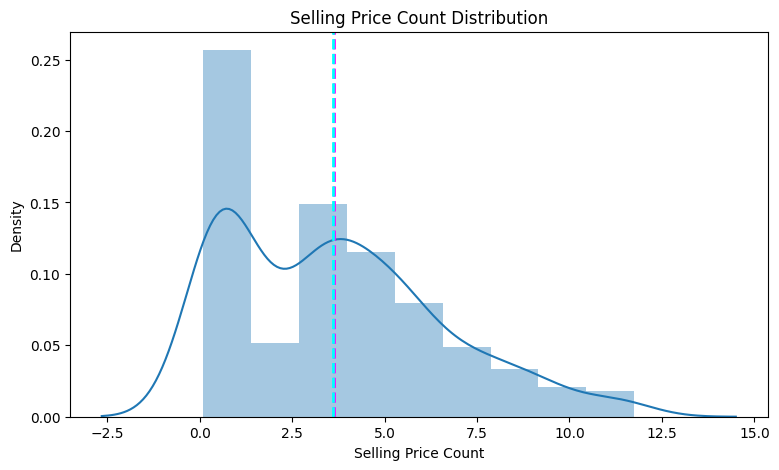

In [ ]:
#tranform the data
plt.figure(figsize=(9,5))
sns.distplot(car_dataset[dependent_variable])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(car_dataset[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(car_dataset[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
car_dataset[dependent_variable].skew()

,0
Selling_Price,0.689765


/tmp/ipython-input-34-390443965.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(car_dataset[dependent_variable]))


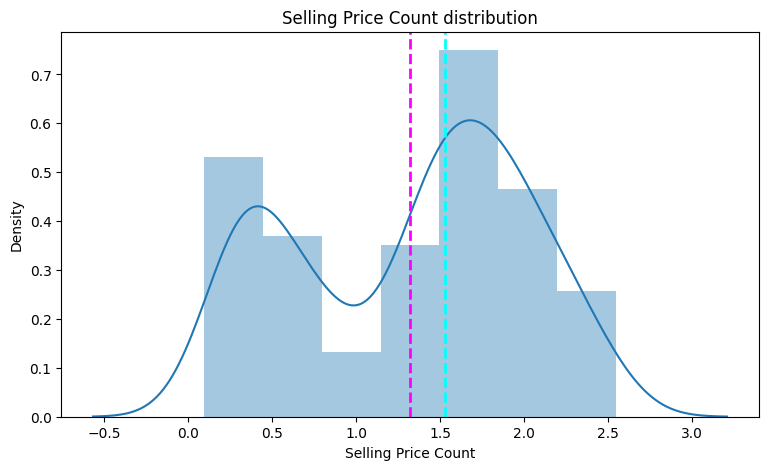

In [ ]:
#visualising the data
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(car_dataset[dependent_variable]))
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(np.log1p(car_dataset['Selling_Price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(car_dataset['Selling_Price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()


In [ ]:
#dependent and indendent variables
X = car_dataset.drop('Selling_Price',axis=1)
y = np.log1p(car_dataset[dependent_variable])



In [ ]:
features = [i for i in car_dataset.columns if i not in ['Selling_Price']]


# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(car_dataset[features])


In [ ]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Checking the train distribution of dependent variable
y_train.value_counts()


,count
Selling_Price,
1.526056,12
0.470004,6
0.371564,6
1.609438,5
1.704748,5
...,...
2.407846,1
2.476538,1
2.521721,1


# Model Implementation

In [ ]:
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  # Apply inverse log transformation to y_test and y_pred as we have used log transformation
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score


In [ ]:
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])


Model1: Linear Regression

In [ ]:

# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)



In [ ]:
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [ ]:

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)


Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8057251534972222


Model2: Lasso Regression

In [ ]:
lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)


In [ ]:
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.851e-01, tolerance: 8.531e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.716e-01, tolerance: 8.163e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.830e-01, tolerance: 8.574e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)



The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.09063346435637067


Model:3 Ridge Regression

In [ ]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)



In [ ]:
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.09113150979730178


In [ ]:
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)



MSE : 3.7245238012419164
RMSE : 1.9299025367209393
MAE : 1.2647169913637006
Train R2 : 0.6408117083878828
Test R2 : 0.49123999397202944
Adjusted R2 :  0.4203999931326917


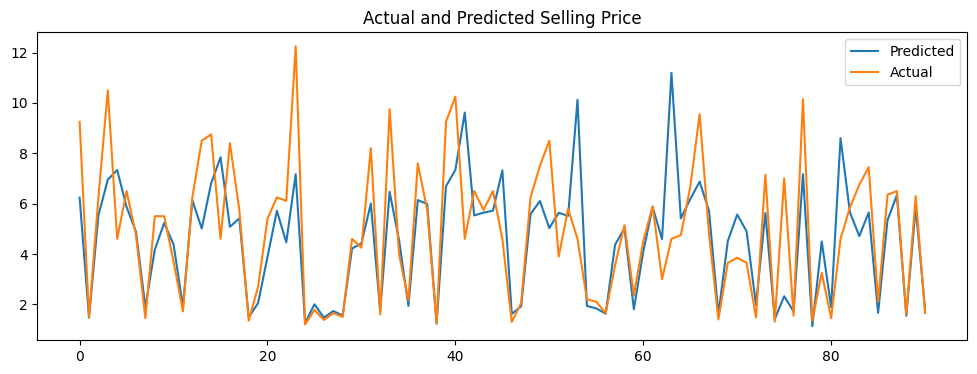

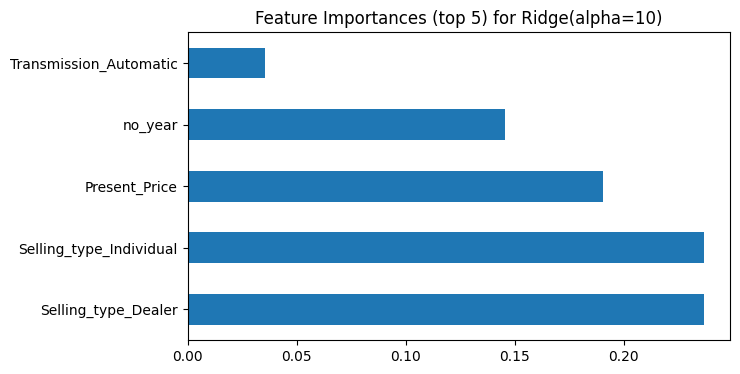

In [ ]:
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result